In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import matplotlib.dates as mdates

In [5]:
df = pd.read_csv('data/data.csv')

In [6]:
df.head(2)

,area,adress,price,price_per_sqm,monthly_fee,size_in_sqm,date_sold
0,Södermalm,"Götgatan 128, 3tr",4850000,74615,2798.0,65,2023-02-03
1,Årsta,Möckelvägen 32,2650000,63095,3281.0,42,2023-02-03


## Counting how many occurences of each area

In [7]:
df['area'].value_counts() # Count different values from a column

Vasastan     757
Södermalm    687
Årsta        294
Östermalm    291
Fredhäll     111
Name: area, dtype: int64

## Plotting the mean price of each area

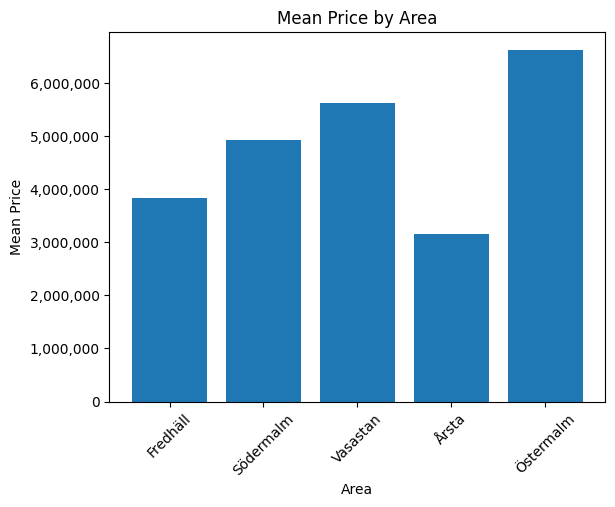

In [8]:
# calculate the mean price for each area
mean_prices = df.groupby("area")["price"].mean()

# plot the bar plot
plt.bar(mean_prices.index, mean_prices.values)
plt.xlabel("Area")
plt.ylabel("Mean Price")
plt.title("Mean Price by Area")
plt.xticks(rotation=45)

# format y-tick labels 
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.show()

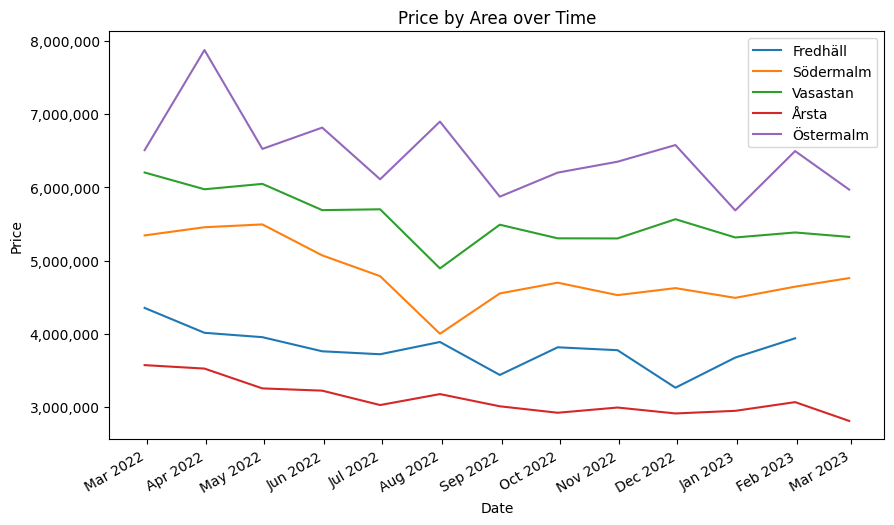

In [9]:
# convert the date_sold column to datetime format
df['date_sold'] = pd.to_datetime(df['date_sold'])

# group by area and date_sold to find the mean price for each group
grouped = df.groupby(['area', pd.Grouper(key='date_sold', freq='M')])['price'].mean().reset_index()

# create a figure with a larger size
fig, ax = plt.subplots(figsize=(10, 6))

# plot the line chart
for area, group in grouped.groupby('area'):
    ax.plot(group['date_sold'], group['price'], label=area)

ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.set_title("Price by Area over Time")
ax.legend()

# set the x-axis to show every month
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()  # format the x-axis as dates

# format y-tick labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.show()

In [12]:
df.shape

(2140, 7)